In [7]:
!pip install -q -U langgraph

In [8]:
# Import libraries
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [9]:
# define AgentState
class AgentState(TypedDict):
  num1: int
  operation1: str
  num2: int
  num3: int
  operation2: str
  num4: int
  result1: int
  result2: int

In [10]:
def adder1(state: AgentState) -> AgentState:
  """
  This is a node to add up numbers.

  Args:
    state = the current state of the agent

  Returns:
    the next state of the agent
    """
  state["result1"] = state["num1"] + state["num2"]
  return state

In [11]:
def subtractor1(state: AgentState) -> AgentState:
  """
  This is a node to subtract numbers.

  Args:
    state = the current state of the agent

  Returns:
    the next state of the agent
    """
  state["result1"] = state["num1"] - state["num2"]
  return state

In [12]:
def pick_next_node1(state: AgentState) -> str:
  """
  This is a node to pick the next node to go to.

  Args:
    state = the current state of the agent

  Returns:
    operation to go with
    """
  if state["operation1"] == "+":
    return "addition_operation"
  elif state["operation1"] == "-":
    return "subtraction_operation"
  else:
    return "Invalid Operation!"

In [13]:
def adder2(state: AgentState) -> AgentState:
  """
  This is the second node to add up numbers.

  Args:
    state = the current state of the agent

  Returns:
    the next state of the agent
    """
  state["result2"] = state["num3"] + state["num4"]
  return state

In [14]:
def subtractor2(state: AgentState) -> AgentState:
  """
  This is the second node to subtract numbers.

  Args:
    state = the current state of the agent

  Returns:
    the next state of the agent
    """
  state["result2"] = state["num3"] - state["num4"]
  return state

In [15]:
def pick_next_node2(state: AgentState) -> str:
  """
  This is the second node to pick the next node to go to.

  Args:
    state = the current state of the agent

  Returns:
    operation to go with
    """
  if state["operation2"] == "+":
    return "addition_operation"
  elif state["operation2"] == "-":
    return "subtraction_operation"
  else:
    return "Invalid Operation!"

In [23]:
# Initialize graph
graph = StateGraph(AgentState)

# Add nodes to the graph
graph.add_node("addition_node1", adder1)
graph.add_node("subtraction_node1", subtractor1)
graph.add_node("router1", lambda state:state)  # the lambda in this case is referred to as  passthrough function

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    pick_next_node1,
    {"addition_operation1": "addition_node1",
     "subtraction_operation1": "subtraction_node1"}
)

graph.add_edge("addition_node1", "router2")
graph.add_edge("subtraction_node1", "router2")

# Add nodes to the graph
graph.add_node("addition_node2", adder2)
graph.add_node("subtraction_node2", subtractor2)
graph.add_node("router2", lambda state:state)  # the lambda in this case is referred to as  passthrough function

graph.add_edge("router2", "addition_node2")
graph.add_edge("router2", "subtraction_node2")

graph.add_conditional_edges(
    "router2",
    pick_next_node2,
    {"addition_operation2": "addition_node2",
     "subtraction_operation2": "subtraction_node2"}
)

graph.add_edge("addition_node2", END)
graph.add_edge("subtraction_node2", END)


# Compile graph
appex = graph.compile()

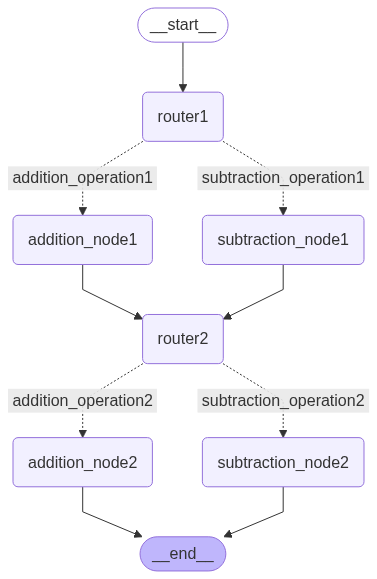

In [24]:
appex

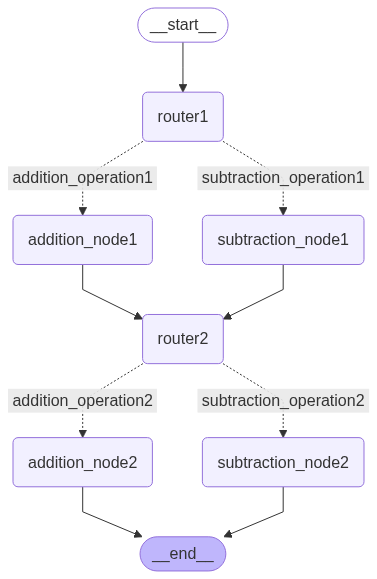

In [25]:
# OR alternatively as you may already know
from IPython.display import Image, display
display(Image(appex.get_graph().draw_mermaid_png()))